<div style="text-align: center; padding: 20px; background-color: #000000; border-radius: 10px; margin: 20px 0;">
    <h1 style="color: #008080 	;">Regression Analysis on Diabetes dataset from the scikit-learn library<h1>
    <hr style="border: 2px solid #008080;">
</div>

In this project we will explore various loss functions and apply gradient descent methods to optimize these functions. Your focus will be on the Diabetes dataset from the scikit-learn library, a well-regarded dataset in the machine learning community. This dataset
consists of medical diagnostic measurements from numerous patients and is specifically designed to study diabetes progression. We will use these data points to predict the quantitative measure of disease progression one year after baseline, thus practicing the
application of regression analysis in a medical context

## Import Needed Libraries

In [3]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
TEST_SIZE = 0.2

# Warm-up: Exploring the Diabetes Dataset

### Loading Dataset

In [5]:
diabetes = datasets.load_diabetes(scaled=False, as_frame=True)
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['disease-progression'] = diabetes.target

### Showing First Rows

In [6]:
display(diabetes_df.head(10))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease-progression
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0,97.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0,138.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0,63.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0,310.0


### Showing Data Types

In [7]:
display(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease-progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


None

As we can see, all columns are numerical (float64) and there are no missing values.

### Handling Missing Values

In [8]:
def count_nulls(df):
    for col in df.columns:
        print(f'column {col} has {df[col].isnull().sum()} missing values')
count_nulls(diabetes_df)

column age has 0 missing values
column sex has 0 missing values
column bmi has 0 missing values
column bp has 0 missing values
column s1 has 0 missing values
column s2 has 0 missing values
column s3 has 0 missing values
column s4 has 0 missing values
column s5 has 0 missing values
column s6 has 0 missing values
column disease-progression has 0 missing values


As we can see, and also it was mentioned before, there are no missing values in this dataset so we can proceed to the next step.

### Normalizing Features

In this part wr will normalize the features to ensure all are on a similar scale. For this purpose we use Min-Max scaling which scales the data to a fixed range, typically between 0 and 1.

In [9]:
def normalize_data(df, scaler = MinMaxScaler()):
    df[df.columns] = scaler.fit_transform(df[df.columns])

normalize_data(diabetes_df)
display(diabetes_df.head(10))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease-progression
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,0.342679
5,0.066667,0.0,0.190083,0.380282,0.205882,0.115538,0.506494,0.000000,0.327003,0.151515,0.224299
6,0.283333,1.0,0.165289,0.394366,0.308824,0.288845,0.363636,0.141044,0.243287,0.363636,0.352025
7,0.783333,1.0,0.338843,0.732394,0.774510,0.714143,0.441558,0.359661,0.347643,0.515152,0.118380
8,0.683333,1.0,0.582645,0.295775,0.401961,0.387450,0.259740,0.282087,0.427955,0.545455,0.264798
9,0.166667,0.0,0.495868,0.323944,0.406863,0.257968,0.272727,0.282087,0.746393,0.454545,0.887850


### Splitting the data into Training and Testing sets

In this part we will split the data into training and testing sets. We will use 80% of the data for training and 20% for testing.

In [10]:
def split_train_test(df, target_column, test_size=TEST_SIZE):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(diabetes_df, 'disease-progression')
print(f'shape of X_train: {X_train.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of X_train: (353, 10)
shape of X_test: (89, 10)
shape of y_train: (353,)
shape of y_test: (89,)


The shape provides information about the dimensions of the variable arrays in the training or testing set. The target variable has only one dimension, while the feature variables have 10 dimensions. Also as we can see the training set has 353 samples and the testing set has 89 samples which is 20% of the total data.

## Part 1: Functions’ Implementation

In [11]:
TEST_SIZE1 = 0.05
X_train, X_test, y_train, y_test = split_train_test(diabetes_df, 'disease-progression', TEST_SIZE1)
print(f'shape of X_train: {X_train.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of X_train: (419, 10)
shape of X_test: (23, 10)
shape of y_train: (419,)
shape of y_test: (23,)


In this part we will implement the following functions:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- $R^{2}$ Score (Coefficient of Determination)

### Mean Squared Error (MSE) Implementation

Mean Squared Error (MSE) is the average of the squared differences between the predicted and actual values. It is a measure of how close a fitted line is to actual data points. A small MSE means the predicted and actual values are close.
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$$

In [12]:
def calc_mean_squared_error(y_true, y_pred):
    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]
    mse = sum(squared_errors) / len(squared_errors)
    return mse

### Mean Absolute Error (MAE) Implementation

Mean Absolute Error (MAE) is the average of the absolute differences between the predicted and actual values. It is a measure of errors between paired observations expressing the same phenomenon.
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$$

In [13]:
def calc_mean_absolute_error(y_true, y_pred):
    absolute_errors = [abs(true - pred) for true, pred in zip(y_true, y_pred)]
    mae = sum(absolute_errors) / len(absolute_errors)
    return mae

### Root Mean Squared Error (RMSE) Implementation

Root Mean Squared Error (RMSE) is the square root of the average of the squared differences between the predicted and actual values. It is a measure of the differences between values predicted by a model and the values observed.
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$$

In [14]:
def calc_root_mean_squared_error(y_true, y_pred):
    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]
    mean_squared_error = sum(squared_errors) / len(squared_errors)
    rmse = math.sqrt(mean_squared_error)
    return rmse

### $R^2$ Score (Coefficient of Determination) Implementation

$R^2$ Score (Coefficient of Determination) is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination. The values for $R^2$ range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values.
$$R^{2} = 1 - \frac{\sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}{\sum_{i=1}^{n} (y_{i} - \bar{y})^{2}}$$

In [15]:
def calc_r2_score(y_true, y_pred):
    mean_true = sum(y_true) / len(y_true)
    tss = sum([(true - mean_true) ** 2 for true in y_true])
    rss = sum([(true - pred) ** 2 for true, pred in zip(y_true, y_pred)])
    r2 = 1 - (rss / tss)
    return r2

### Adjusted $R^2$ Score Implementation

Adjusted $R^2$ Score is a modified version of $R^2$ that adjusts for the number of predictors in a regression model. It is calculated as:
$$Adjusted \ R^{2} = 1 - \frac{(1 - R^{2}) (n - 1)}{n - p - 1}$$

In [16]:
def calc_adjusted_r2_score(y_true, y_pred, n_features):
    r2 = calc_r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    return adjusted_r2

## Part 2: Building and Training the Linear Regression Model

In [17]:
def train_linear_regression(X_train, y_train, predict):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(predict)

y_test_pred = train_linear_regression(X_train, y_train, X_test)


## Part 3: Evaluating the Model

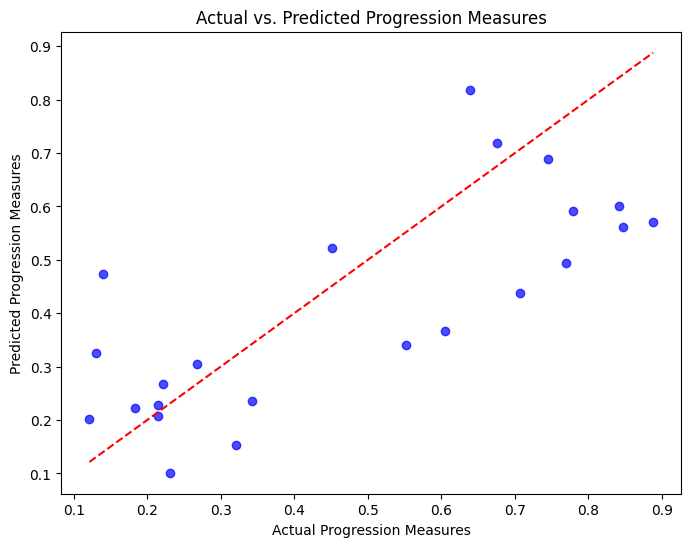

In [18]:
def plot_results(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title('Actual vs. Predicted Progression Measures')
    plt.xlabel('Actual Progression Measures')
    plt.ylabel('Predicted Progression Measures')
    plt.show()
    
plot_results(y_test, y_test_pred)

In [19]:
def print_statics(data, mse, mae, rmse, r2):
    print(f'--------------------------------------\nStatistics For {data}\n--------------------------------------')
    print(f'mean squared error: {mse}')
    print(f'mean absolute error: {mae}')
    print(f'root mean squared error: {rmse}')
    print(f'r2 score: {r2}')

def calc_metrics(y_true, y_pred):
    mse = calc_mean_squared_error(y_true, y_pred)
    mae = calc_mean_absolute_error(y_true, y_pred)
    rmse = calc_root_mean_squared_error(y_true, y_pred)
    r2 = calc_r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

mse, mae, rmse, r2 = calc_metrics(y_test, y_test_pred)
print_statics('Test Data', mse, mae, rmse, r2)


--------------------------------------
Statistics For Test Data
--------------------------------------
mean squared error: 0.03412341559589118
mean absolute error: 0.15351501644437401
root mean squared error: 0.18472524352640918
r2 score: 0.5163792932946591


In [20]:
y_train_pred = train_linear_regression(X_train, y_train, X_train)
mse, mae, rmse, r2 = calc_metrics(y_train, y_train_pred)
print_statics('Train Data', mse, mae, rmse, r2)

--------------------------------------
Statistics For Train Data
--------------------------------------
mean squared error: 0.027476630917671878
mean absolute error: 0.13384373047504514
root mean squared error: 0.16576076410801163
r2 score: 0.5135880257685111


<style>
table {
    margin-left: auto;
    margin-right: auto;
}
</style>

| Data Type / Optimizer   | MSE   | MAE   | RMSE  | $R^{2}$ Score |                                                                 
|:------------------------|:------|:------|:------|:--------------|
| Train Set               | 0.027 | 0.13  | 0.16  | 0.52          |
| Test Set                | 0.028 | 0.13  | 0.16  | 0.45          |


## Part 4: Ordinary Least Squares (OLS)

### Using Functions from sklearn.metrics

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def sklearn_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

mse, mae, rmse, r2 = sklearn_metrics(y_test, y_test_pred)
print_statics('Test Data', mse, mae, rmse, r2)

--------------------------------------
Statistics For Test Data
--------------------------------------
mean squared error: 0.03412341559589118
mean absolute error: 0.15351501644437401
root mean squared error: 0.18472524352640918
r2 score: 0.5163792932946591


In [22]:
mse, mae, rmse, r2 = sklearn_metrics(y_train, y_train_pred)
print_statics('Train Data', mse, mae, rmse, r2)

--------------------------------------
Statistics For Train Data
--------------------------------------
mean squared error: 0.027476630917671878
mean absolute error: 0.13384373047504522
root mean squared error: 0.16576076410801163
r2 score: 0.513588025768511


As we can see, the results are similar to the ones we implemented before.

In [23]:
import statsmodels.api as sm
ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()
y_pred = ols_results.predict(X_test)
display(ols_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     disease-progression   R-squared (uncentered):                   0.869
Model:                             OLS   Adj. R-squared (uncentered):              0.866
Method:                  Least Squares   F-statistic:                              271.1
Date:                 Wed, 24 Apr 2024   Prob (F-statistic):                   1.57e-173
Time:                         23:31:59   Log-Likelihood:                          158.07
No. Observations:                  419   AIC:                                     -296.1
Df Residuals:                      409   BIC:                                     -255.8
Df Model:                           10                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0072      0.042      0.172      0.863      -0.075       0.089
sex           -0.0777      0.019     -4.149      0.000      -0.114      -0.041
bmi            0.4303      0.056      7.707      0.000       0.321       0.540
bp             0.2559      0.050      5.084      0.000       0.157       0.355
s1            -0.4544      0.193     -2.349      0.019      -0.835      -0.074
s2             0.2297      0.205      1.119      0.264      -0.174       0.633
s3            -0.0398      0.068     -0.584      0.559      -0.174       0.094
s4             0.1385      0.117      1.180      0.238      -0.092       0.369
s5             0.4746      0.092      5.158      0.000       0.294       0.655
s6             0.0474      0.057      0.832      0.406      -0.065       0.160
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.942
Skew:                           0.045   Prob(JB):                        0.624
Kurtosis:                       2.786   Cond. No.                         49.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Different Splitting Ratios
Now we do the analysis with `TEST_SIZE = 5%` and `TRAIN_SIZE = 95%`. The results are shown below.

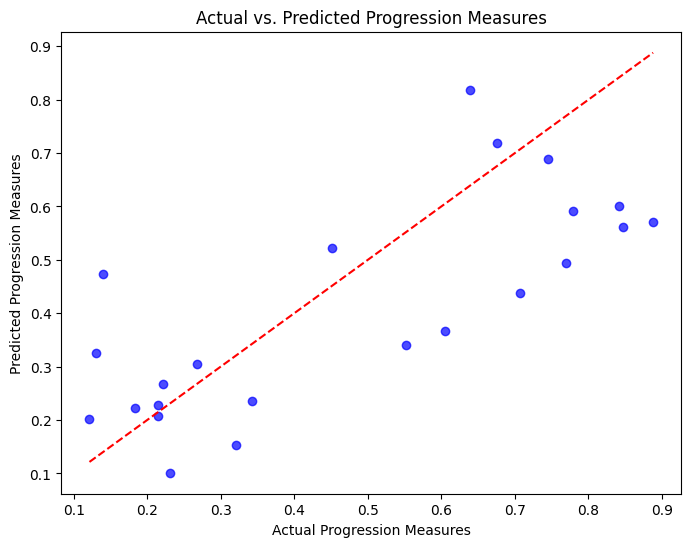

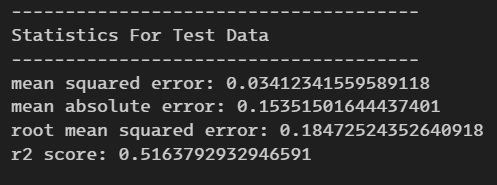 
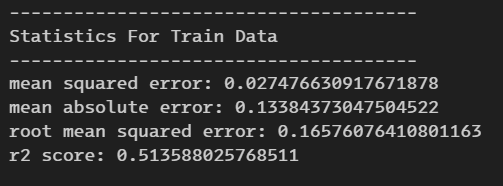

# Different Features Selection
As we calculated p-values for the different features in last section of part 4, we select those features which have p-values less than 0.05. The features which have p-values less than 0.05 are shown below.

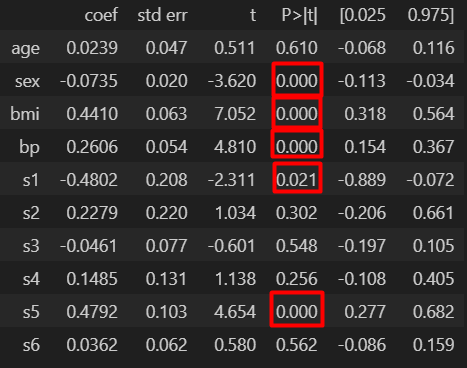

The reason for selecting these features is that they have a significant impact on the target variable. The features which have p-values greater than 0.05 are not selected because they do not have a significant impact on the target variable.

Now we will use these features to train the model and evaluate it.

In [24]:
# select the best features using the p-values (sex, bmi, bp, s1, s5)
def select_features(X_train, X_test, ols_results):
		p_values = ols_results.pvalues
		significant_features = p_values[p_values < 0.05].index
		X_train_selected = X_train[significant_features]
		X_test_selected = X_test[significant_features]
		return X_train_selected, X_test_selected

In [25]:
X_train_selected, X_test_selected = select_features(X_train, X_test, ols_results)
print(f'X_train_selected shape: {X_train_selected.shape}')
print(f'X_test_selected shape: {X_test_selected.shape}')

X_train_selected shape: (419, 5)
X_test_selected shape: (23, 5)


In [26]:
y_test_pred = train_linear_regression(X_train_selected, y_train, X_test_selected)
mse, mae, rmse, r2 = sklearn_metrics(y_test, y_test_pred)
print_statics('Test Data', mse, mae, rmse, r2)

--------------------------------------
Statistics For Test Data
--------------------------------------
mean squared error: 0.03135047999139349
mean absolute error: 0.14766316699477014
root mean squared error: 0.17706066754475283
r2 score: 0.5556792594110949


In [27]:
y_train_pred = train_linear_regression(X_train_selected, y_train, X_train_selected)
mse, mae, rmse, r2 = sklearn_metrics(y_train, y_train_pred)
print_statics('Train Data', mse, mae, rmse, r2)

--------------------------------------
Statistics For Train Data
--------------------------------------
mean squared error: 0.028681284191809785
mean absolute error: 0.1372382033199388
root mean squared error: 0.16935549649128542
r2 score: 0.4922623479918742


### Results
As we can see, the results are similar to the ones we implemented before.

### Select Features with Strong Correlation
Now we will select the features which have strong correlation with the target variable.

In [31]:
# select the best features using the correlation coefficient
def select_features(X_train, X_test, y_train, threshold=0.4):
		correlation_matrix = X_train.corrwith(y_train)
		significant_features = correlation_matrix[abs(correlation_matrix) > threshold].index
		X_train_selected = X_train[significant_features]
		X_test_selected = X_test[significant_features]
		return X_train_selected, X_test_selected, significant_features, correlation_matrix

In [32]:
X_train_selected, X_test_selected, significant_features, correlation_matrix = select_features(X_train, X_test, y_train)

In [33]:
print(f'X_train_selected shape: {X_train_selected.shape}')
print(f'X_test_selected shape: {X_test_selected.shape}')
print(f'significant features: {significant_features}')
print(f'correlation matrix: {correlation_matrix}')

X_train_selected shape: (419, 4)
X_test_selected shape: (23, 4)
significant features: Index(['bmi', 'bp', 's4', 's5'], dtype='object')
correlation matrix: age    0.183146
sex    0.028448
bmi    0.587414
bp     0.438960
s1     0.209977
s2     0.174549
s3    -0.387046
s4     0.421933
s5     0.550800
s6     0.374411
dtype: float64


In [34]:
y_test_pred = train_linear_regression(X_train_selected, y_train, X_test_selected)
mse, mae, rmse, r2 = sklearn_metrics(y_test, y_test_pred)
print_statics('Test Data', mse, mae, rmse, r2)

--------------------------------------
Statistics For Test Data
--------------------------------------
mean squared error: 0.032296560544159754
mean absolute error: 0.14969552610340606
root mean squared error: 0.17971243847925428
r2 score: 0.5422707498132429


In [35]:
y_train_pred = train_linear_regression(X_train_selected, y_train, X_train_selected)
mse, mae, rmse, r2 = sklearn_metrics(y_train, y_train_pred)
print_statics('Train Data', mse, mae, rmse, r2)

--------------------------------------
Statistics For Train Data
--------------------------------------
mean squared error: 0.029751378895229972
mean absolute error: 0.1425018309045657
root mean squared error: 0.172485880277865
r2 score: 0.47331872717952395


___

## Questions

___

#### Q1 - Analyze and evaluate the values in Table (1).

The values for both the training and test datasets are approximately equal. the model shows a good level of consistency between training and testing performance, which is indicative of a well-fitting model.

- `Mean Squared Error (MSE)`: The MSE for both the train and test sets is about 0.027, which suggests that the model has a consistent performance on both datasets. A low MSE indicates that the model's predictions are close to the actual values.

- `Mean Absolute Error (MAE)`: The MAE for both the train and test sets is 0.13. This value represents the average absolute difference between the predicted values and the actual values. Like MSE, a lower MAE suggests better model performance, and the consistency between train and test sets is a good sign.

- `Root Mean Squared Error (RMSE)`: The RMSE values are 0.16 for both train and test sets. RMSE is the square root of MSE and is useful for understanding the magnitude of the error in the same units as the response variable. Consistent RMSE values across train and test sets indicate that the model generalizes well.

- `R-squared (R²) Score`: The R² score for the train set is 0.52, and for the test set, it is 0.45. R² is a statistical measure that represents the proportion of variance for the dependent variable that's explained by the independent variables in the model. An R² of 0.52 means that 52% of the variance in the train set is predictable from the independent variables. The slight drop in the test set R² to 0.45 suggests that the model may not capture all the variability in new data, but it's still a moderate score.

The model works well and gives similar results during both training and testing. However, there is room for improvement, especially in terms of the R² score, which could potentially be increased with feature engineering, model tuning, or trying different modeling techniques.

___

#### Q2 - Review the R² and Adjusted R² values obtained in part 4. Explain what these values indicate and what the implications of high or low values might be. Also, discuss the differences between these two metrics.

- `R-squared`: The R-squared value of 0.873 suggests that approximately 87.3% of the variance in the dependent variable can be explained by the independent variables in the model. It's a measure of the goodness of fit for the model. A high R-squared value close to 1 indicates a model that explains a large portion of the variance, while a low value indicates less explanatory power.

- `Adjusted R-squared`: The Adjusted R-squared value of 0.869 adjusts the R-squared value for the number of predictors in the model. It is a more accurate measure when comparing models with different numbers of independent variables. It penalizes the model for adding independent variables that do not improve the model's ability to predict.

A high R-squared value means the model fits the data well, but it doesn't necessarily mean the model is good. It could be overfitting, especially if the model has a lot of predictors.

A low R-squared value might mean the model is not fitting the data well, or it could be that the data is inherently difficult to model with a linear approach.

Differences between R-squared and Adjusted R-squared:

`R-squared` does not take into account the number of predictors in the model. Therefore, adding more predictors to a model will always increase the R-squared value, even if the predictors are not significant.

`Adjusted R-squared` accounts for the number of predictors and only increases if the new predictor improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance.

both metrics are useful, the Adjusted R-squared is often more reliable for determining the quality of a model, especially when comparing models with a different number of predictors. It's important to look at both values in conjunction with other model evaluation metrics to get a comprehensive understanding of the model's performance.

___

#### Q3 - Review the p-values obtained in part 4 for each column of data and explain what these values indicate. Discuss what an appropriate value for p-values is and which columns currently have suitable values.

In the context of an OLS (Ordinary Least Squares) summary, p-values are used to determine the `÷`statistical significance of each coefficient` in the regression model:

A `p-value` measures the `probability that the coefficient for an independent variable is actually zero`, given the data. In other words, it tests the null hypothesis that the variable has no effect on the dependent variable.

- ##### $H_{0}$ (Null Hypothesis): Variable has no effect on the dependent variable.
- ##### $H_{a}$ (Alternative Hypothesis): Variable has effect on the dependent variable.

A `low p-value (typically less than 0.05)` suggests that `there is a statistically significant association between the predictor and the dependent variable`. It indicates that the likelihood of the coefficient being zero (and hence having no effect) is low, and therefore, the predictor is likely to be a meaningful addition to the model.

A `high p-value` indicates that `the coefficient may not be different from zero`, suggesting that the predictor variable may not have a significant effect on the outcome.

The threshold for what constitutes an "appropriate" or "significant" p-value can vary depending on the field of study and the specific research question. However, a common convention is to use a p-value of 0.05 as a cutoff. This means that if the p-value is less than 0.05, the result is considered statistically significant.

- Columns with suitable p-values:

1. `sex`
2. `bmi`: Body Mass Index
3. `bp`:  Average Blood Pressure
4. `s1`:  Total serum cholesterol
5. `s5`:  Possibly log of serum triglycerides level

___

#### Q4 - Assess and analyze the importance of each feature in the dataset based on the results obtained in part 4 regarding an individual's diabetic condition.

the features with p-values of 0.000 (`sex`, `bmi`, `bp`, and `s5`) are the most statistically significant predictors of diabetes in this dataset and should be given considerable attention when interpreting the model. The `s1` feature is also significant as its p-value is equal to 0.021, although its influence might be less strong compared to sex, bmi, or bp.

 Features with p-values greater than 0.05 (`age`, `s2`, `s3`, `s4`, and `s6`) do not appear to contribute significantly to the model's ability to predict diabetes. It's important to note that while p-values provide insight into statistical significance, they do not measure the effect size or the practical significance of the predictors.